In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('movies_initial.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46014 entries, 0 to 46013
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   imdbID       46014 non-null  int64  
 1   title        46014 non-null  object 
 2   year         46014 non-null  object 
 3   rating       24629 non-null  object 
 4   runtime      43377 non-null  object 
 5   genre        45615 non-null  object 
 6   released     43002 non-null  object 
 7   director     45409 non-null  object 
 8   writer       42942 non-null  object 
 9   cast         44928 non-null  object 
 10  metacritic   9401 non-null   float64
 11  imdbRating   44300 non-null  float64
 12  imdbVotes    44299 non-null  float64
 13  poster       35798 non-null  object 
 14  plot         42161 non-null  object 
 15  fullplot     41421 non-null  object 
 16  language     44899 non-null  object 
 17  country      45830 non-null  object 
 18  awards       23542 non-null  object 
 19  last

In [14]:
#runtime '15 min' gibi bir str değer, bize sadece zaman bilgisi float olarak lazım
df['runtime'] = df['runtime'].str.extract(r'(\d+)').astype(float)

In [17]:
#year pandas üzerinden numeric yaptık yani yıl bilgisi belirtilmeyenlere NaN ile doldurdu
#type olarakta Int64 verdik çünkü NaN verileri sorun çıkartmıyor.
df['year'] = pd.to_numeric(df['year'], errors='coerce').astype('Int64')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46014 entries, 0 to 46013
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   imdbID       46014 non-null  int64  
 1   title        46014 non-null  object 
 2   year         45938 non-null  Int64  
 3   rating       24629 non-null  object 
 4   runtime      43377 non-null  float64
 5   genre        45615 non-null  object 
 6   released     43002 non-null  object 
 7   director     45409 non-null  object 
 8   writer       42942 non-null  object 
 9   cast         44928 non-null  object 
 10  metacritic   9401 non-null   float64
 11  imdbRating   44300 non-null  float64
 12  imdbVotes    44299 non-null  float64
 13  poster       35798 non-null  object 
 14  plot         42161 non-null  object 
 15  fullplot     41421 non-null  object 
 16  language     44899 non-null  object 
 17  country      45830 non-null  object 
 18  awards       23542 non-null  object 
 19  last

In [21]:
#en çok film çeken yönetmenler
director_counts = df['director'].value_counts()
top_10_director = director_counts[director_counts.index != 'Unknown'].head()
top_10_director

director
John Ford           59
Michael Curtiz      56
Georges M�li�s      56
Alfred Hitchcock    54
Werner Herzog       53
Name: count, dtype: int64

In [25]:
#en popüler 10 tür
pop_tur = df[df['genre'] != 'Unknown'].copy()
pop_tur['genre'] = pop_tur['genre'].str.split(', ')
pop_tur= pop_tur.explode('genre')
top_10 = pop_tur['genre'].value_counts().head(10)
top_10

genre
Drama          21993
Comedy         14045
Romance         6176
Action          5917
Thriller        5576
Crime           5454
Horror          4493
Documentary     4240
Adventure       4038
Mystery         2555
Name: count, dtype: int64

In [29]:
#0.126 güçlü bir korelasyon olmadığını gösteriyor, imbd puanı ve film uzunluğunun
corr = df['imdbRating'].corr(df['runtime'])
corr

0.1262460809474016

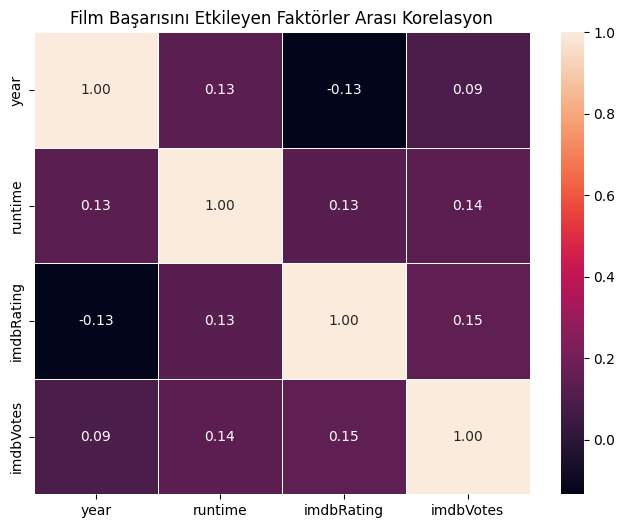

In [35]:
#seaborn ile heatmap corelasyon haritası
import seaborn as sns
num = ['year', 'runtime', 'imdbRating', 'imdbVotes']
df_corr = df[num].copy()
corr_matrix = df_corr.corr()

plt.figure(figsize=(8,6))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    linewidth=.5,)
plt.title('Film Başarısını Etkileyen Faktörler Arası Korelasyon')
plt.show()

C:\Users\bora\AppData\Local\Temp\ipykernel_23028\3888594187.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('Unknown', inplace=True)


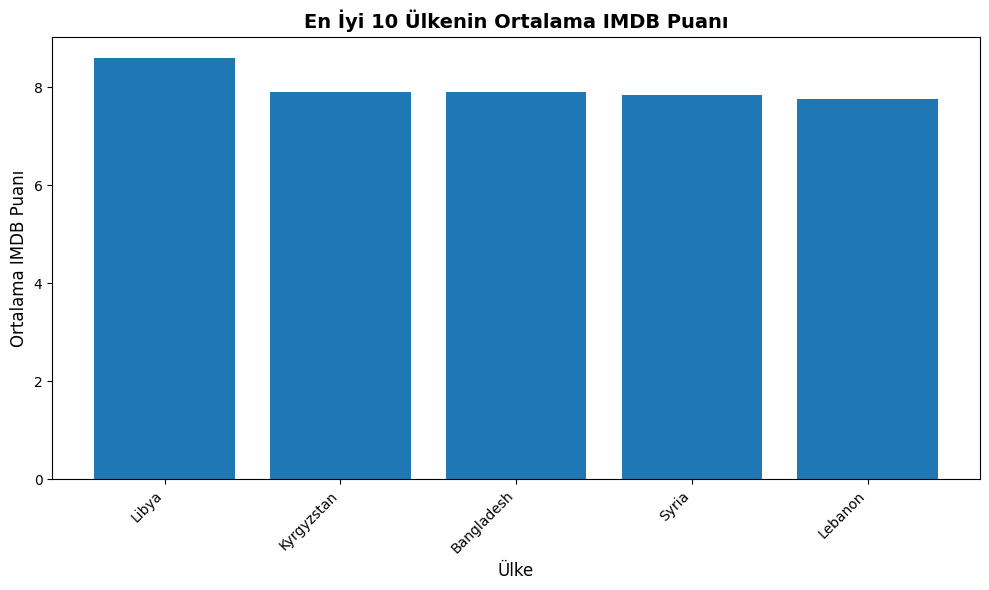

In [38]:
#ülkerini tek ülke yapıyoruz
df['country'] = df['country'].str.split(',').str[0].str.strip()
df['country'].fillna('Unknown', inplace=True)

#ülkelerin puan ortalaması
country_ratings = df.groupby('country')['imdbRating'].mean()

#en iyi 10 ülke
top10_country = country_ratings.loc[df['country']].sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))

bars = plt.bar(
    top10_country.index, 
    top10_country.values, 
)

plt.title('En İyi 10 Ülkenin Ortalama IMDB Puanı', fontsize=14, fontweight='bold')
plt.xlabel('Ülke', fontsize=12)
plt.ylabel('Ortalama IMDB Puanı', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\bora\AppData\Local\Temp\ipykernel_23028\2012148721.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color=plt.cm.get_cmap('viridis', 10)(np.arange(10)) # Matplotlib renk paleti kullanımı


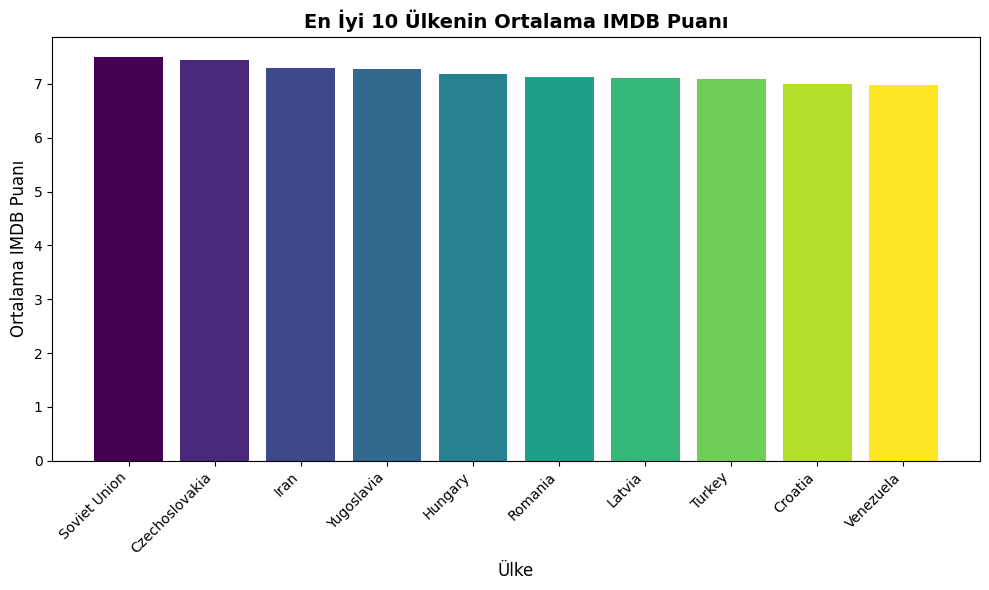

In [40]:
valid_countries = df['country'].value_counts()
top_countries = valid_countries[valid_countries > 15].index

top_country_ratings = country_ratings.loc[top_countries].sort_values(ascending=False).head(10)

# Matplotlib Bar Plot ile görselleştirme
plt.figure(figsize=(10, 6))

bars = plt.bar(
    top_country_ratings.index, 
    top_country_ratings.values, 
    color=plt.cm.get_cmap('viridis', 10)(np.arange(10)) # Matplotlib renk paleti kullanımı
)

plt.title('En İyi 10 Ülkenin Ortalama IMDB Puanı', fontsize=14, fontweight='bold')
plt.xlabel('Ülke', fontsize=12)
plt.ylabel('Ortalama IMDB Puanı', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()